In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from numpy import zeros, newaxis
from evaluation.evaluate import *
from sklearn.preprocessing import MinMaxScaler
from common.data_loader import *
from common.preprocessing import*

from os import path, environ
import matplotlib.pyplot as plt



## Transformer

## load data

In [2]:
# Load dataset
full_data = pd.read_csv("data/wtbdata_245days.csv")
# train_data = pd.read_csv("data/train_data.csv")
submission = pd.read_csv("data/sample_submission.csv")
test_data = pd.read_csv("info/target.csv")
# full_data = full_data.fillna(method = 'bfill')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727520 entries, 0 to 4727519
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   TurbID   int64  
 1   Day      int64  
 2   Tmstamp  object 
 3   Wspd     float64
 4   Wdir     float64
 5   Etmp     float64
 6   Itmp     float64
 7   Ndir     float64
 8   Pab1     float64
 9   Pab2     float64
 10  Pab3     float64
 11  Prtv     float64
 12  Patv     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 468.9+ MB


In [3]:
full_data = impute_data(full_data)

100%|██████████| 134/134 [00:22<00:00,  6.02it/s]


* Data name: Imputing
  - Number of data: 4691542
  - Number of nan rows: 0


In [4]:
full_data = outlier_handler(full_data, ['Etmp','Itmp'], window_length=11, smooth=False)

100%|██████████| 244/244 [03:10<00:00,  1.28it/s]


## preprocess

In [6]:
# Preprocessing
full_data = feature_engineering(full_data, compute_Pmax_method ='clipping', compute_Pmax_clipping=False)

* Data name: Feature engineering
  - Number of data: 4691542
  - Number of nan rows: 720


In [ ]:
full_data = marking_data(full_data, 0)

In [7]:
features = select_features(full_data, threshold = 0.5)

KeyboardInterrupt: 

## feature selecting

In [8]:
features = ['TurbID', 'Day', 'Tmstamp','Etmp4', 'Etmp5', 'Patv5','Wspd5', 'locX', 'locY','TimeX', 'TimeY', 'DayX', 'DayY', 'WdirX', 'WdirY','Wspd', 'Etmp_abs','RPM', 'Bspd2', 'Bspd3', 'Bspd1','Patv']
full_data_selected = full_data[features]

In [9]:
data = full_data_selected[(full_data_selected['Day']>=6)&(full_data_selected['Day']<=220)]
data

TurbID  Day    Tmstamp  Etmp4  Etmp5   Patv5  Wspd5    locX    locY     TimeX     TimeY  \
720           1    6   0.000000  28.10  30.73  494.66   6.17  3000.0  6000.0  1.000000  0.000000   
721           1    6   0.166667  27.87  30.73  494.66   6.17  3000.0  6000.0  0.999048  0.043619   
722           1    6   0.333333  27.38  30.60  509.76   6.27  3000.0  6000.0  0.996195  0.087156   
723           1    6   0.500000  27.13  30.52  542.53   6.42  3000.0  6000.0  0.991445  0.130526   
724           1    6   0.666667  26.99  30.49  509.36   6.25  3000.0  6000.0  0.984808  0.173648   
...         ...  ...        ...    ...    ...     ...    ...     ...     ...       ...       ...   
4723915     134  220  23.166667  -2.68  -1.22  184.26   3.86     0.0  6500.0  0.976296 -0.216440   
4723916     134  220  23.333333  -2.59  -1.52   86.39   2.51     0.0  6500.0  0.984808 -0.173648   
4723917     134  220  23.500000  -2.52  -1.82   73.08   2.44     0.0  6500.0  0.991445 -0.130526   
4723918     134  220  23.666667  -2.29  -1.97   43.99   1.90     0.0  6500.0  0.996195 -0.087156   
4723919     134  220  23.833333  -2.06  -2.14   48.54   2.02     0.0  6500.0  0.999048 -0.043619   

             DayX      DayY     WdirX     WdirY  Wspd  Etmp_abs        RPM      Bspd2      Bspd3  \
720      0.994678  0.103033 -0.958770 -0.284183  6.12    264.20   7.039327   7.039327   7.039327   
721      0.994678  0.103033 -0.960050 -0.279829  6.98    264.05   8.029022   8.029022   8.029022   
722      0.994678  0.103033 -0.945916 -0.324413  8.99    263.95  10.324140  10.324140  10.324140   
723      0.994678  0.103033 -0.929455 -0.368936  8.50    263.90   9.776642   9.776642   9.776642   
724      0.994678  0.103033 -0.902886 -0.429881  7.82    263.81   8.991491   8.991491   8.991491   
...           ...       ...       ...       ...   ...       ...        ...        ...        ...   
4723915 -0.800290 -0.599614  0.996345 -0.085417  3.91    246.05   4.635154   4.635154   4.635154   
4723916 -0.800290 -0.599614  0.999116 -0.042050  3.76    246.05   4.477809   4.477809   4.477809   
4723917 -0.800290 -0.599614  0.987551 -0.157296  3.76    246.05   4.461602   4.461602   4.461602   
4723918 -0.800290 -0.599614  0.995346 -0.096367  4.93    246.05   5.871002   5.871002   5.871002   
4723919 -0.800290 -0.599614  0.999086 -0.042748  4.71    246.05   5.491453   5.491453   5.491453   

             Bspd1     Patv  
720       7.039327   545.13  
721       8.029022   736.93  
722      10.324140  1159.05  
723       9.776642  1046.77  
724       8.991491   909.39  
...            ...      ...  
4723915   4.635154   189.04  
4723916   4.477809   187.86  
4723917   4.461602   239.85  
4723918   5.871002   309.98  
4723919   5.491453   277.85  

[4112662 rows x 22 columns]

## make dataset

In [11]:
SEQ_LEN = 2
day = 144
hour = 6
ten_minute = 1
train_x, train_y, val_x, val_y, test_x = make_train_val_test_data(data, in_seq_len=SEQ_LEN*144, out_seq_len=SEQ_LEN*144, stride=day, shuffle=False, test_size=0)

100%|██████████| 134/134 [00:23<00:00,  5.76it/s]


* Data Split
  - Train data(X, y)     : (26391, 288, 19) (26391, 288, 19)
  - Validation data(X, y): (0,) (0,)
  - Test data(X)         : (134, 288, 19)


In [12]:
test_y = full_data_selected[(full_data_selected['Day']>=221)&(full_data_selected['Day']<=222)]
test_y = test_y.iloc[:,3:].to_numpy().reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2])
test_y.shape

(134, 288, 19)

In [13]:
train_x, train_y = np.array(train_x, dtype=np.float32), np.array(train_y, dtype=np.float32)
# val_x, val_y = np.array(val_x, dtype=np.float32), np.array(val_y, dtype=np.float32)
test_x,test_y = np.array(test_x, dtype=np.float32), np.array(test_y, dtype=np.float32)

In [14]:
scaler = MinMaxScaler()
scaler.fit(train_x.reshape(-1,train_x.shape[2]))
train_x = scaler.transform(train_x.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
train_y= scaler.transform(train_y.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
# val_x = scaler.transform(val_x.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
# val_y = scaler.transform(val_y.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
test_x = scaler.transform(test_x.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
test_y = scaler.transform(test_y.reshape(-1,train_x.shape[2])).reshape(-1,*train_x.shape[1:])
print("Train data(X, y):", train_x.shape, train_y.shape)
# print("Validation data(X, y):", val_x.shape, val_y.shape)
print("Test data(X,y):", test_x.shape, test_y.shape)

Train data(X, y): (26391, 288, 19) (26391, 288, 19)
Test data(X,y): (134, 288, 19) (134, 288, 19)


In [15]:
output_shape = 1
train_y = train_y[:,:,-output_shape:].reshape(-1,train_y.shape[1],output_shape)
# val_y = val_y[:,:,-output_shape:].reshape(-1,train_y.shape[1],output_shape)
test_y = test_y[:,:,-output_shape:].reshape(-1,train_y.shape[1],output_shape)

In [16]:
print("Train data(X, y):", train_x.shape, train_y.shape)
# print("Validation data(X, y):", val_x.shape, val_y.shape)
print("Test data(X,y):", test_x.shape, test_y.shape)

Train data(X, y): (26391, 288, 19) (26391, 288, 1)
Test data(X,y): (134, 288, 19) (134, 288, 1)


In [17]:
import datetime
set_random_seed(42)

import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
from tqdm import tqdm
import seaborn as sns
from tst import Transformer
from tst import loss
from tst.src.utils import compute_loss
from tst.src.visualization import map_plot_function, plot_values_distribution, plot_error_distribution, plot_errors_threshold, plot_visual_sample
from livelossplot import PlotLosses
# # Config
sns.set()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

Using device cuda:0


In [18]:
BATCH_SIZE = 64
NUM_WORKERS = 1
LR = 1e-4
EPOCHS = 100
SEQ_LEN = 2
MARKING = 0


In [19]:

# Model parameters
d_model = 128 # Lattent dim
q = 16 # Query size
v = 16 # Value size
h = 8 # Number of heads
N = 4 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.5 # Dropout rate
pe = None # Positional encoding
chunk_mode = None

d_input = train_x.shape[-1] # From dataset
d_output = train_y.shape[-1] # From dataset



In [20]:
class CondLoss(nn.Module):
    def __init__(self, loss_fn, marked_target_value, **kwargs):
        self.loss_fn = loss_fn
        self.marked_target_value = marked_target_value
        super().__init__(**kwargs)
        
        if self.loss_fn == 'rmse':
            self.loss_fn = torch.sqrt(nn.MSELoss())
        elif self.loss_fn == 'mse':
            self.loss_fn = nn.MSELoss()
        elif self.loss_fn == 'mae':
            self.loss_fn = nn.L1Loss()
        elif self.loss_fn == 'huber':
            self.loss_fn = nn.HuberLoss()
        else:
            raise NotImplementedError
        
    def forward(self,
                y_true: torch.Tensor,
                y_pred: torch.Tensor) -> torch.Tensor:
        # y_true, y_pred: [B, S, D]
        
        assert y_true.shape == y_pred.shape, f'Shape mismatch for output and ground truth array {y_true.shape} and {y_pred.shape}'

        _, S, D = y_true.shape  # Batch, Sequence, Dim of features
        y_true = torch.reshape(y_true, (-1, D))
        y_pred = torch.reshape(y_pred, (-1, D))

        idxs_valid = (y_true[:, -1] != self.marked_target_value)
        y_true_valid, y_pred_valid = y_true[idxs_valid], y_pred[idxs_valid]
        return self.loss_fn(y_pred_valid, y_true_valid)


In [21]:
net = Transformer(d_input, d_model, d_output, q, v, h, N, attention_size=attention_size, dropout=dropout, chunk_mode=chunk_mode, pe=pe).to(device)
optimizer = optim.Adam(net.parameters(), lr=LR)
loss_function = nn.MSELoss()
mae= nn.L1Loss()

In [22]:
net.modules

<bound method Module.modules of Transformer(
  (layers_encoding): ModuleList(
    (0): Encoder(
      (_selfAttention): MultiHeadAttention(
        (_W_q): Linear(in_features=128, out_features=128, bias=True)
        (_W_k): Linear(in_features=128, out_features=128, bias=True)
        (_W_v): Linear(in_features=128, out_features=128, bias=True)
        (_W_o): Linear(in_features=128, out_features=128, bias=True)
      )
      (_feedForward): PositionwiseFeedForward(
        (_linear1): Linear(in_features=128, out_features=512, bias=True)
        (_linear2): Linear(in_features=512, out_features=128, bias=True)
      )
      (_layerNorm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (_layerNorm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (_dopout): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (_selfAttention): MultiHeadAttention(
        (_W_q): Linear(in_features=128, out_features=128, bias=True)
        (_W_k): Linear(in_features=128, o

In [23]:
class Dataset(Dataset):
    def __init__(self, text, labels):
        self.labels = labels
        self.text = text
    def __len__(self):
            return len(self.labels)
    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.text[idx]
        sample =(text, label)
        return sample

In [24]:
dataset_train = Dataset(train_x, train_y)
dataset_val = Dataset(val_x, val_y)
dataset_test = Dataset(test_x, test_y)

In [25]:
dataloader_train = DataLoader(dataset_train,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS,
                              pin_memory=False
                             )
dataloader_val = DataLoader(dataset_val,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS
                            )
dataloader_test = DataLoader(dataset_test,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS
                            )

In [26]:
from pytz import timezone

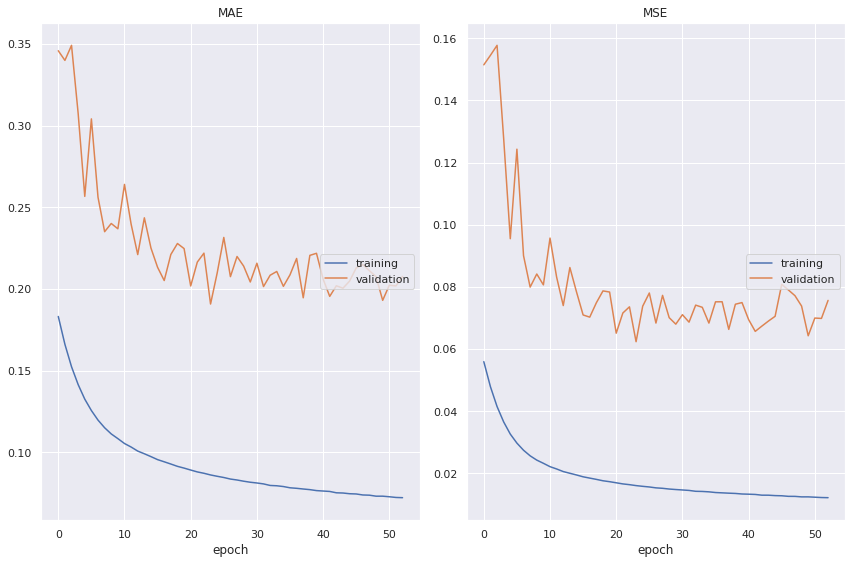

MAE
	training         	 (min:    0.072, max:    0.183, cur:    0.072)
	validation       	 (min:    0.191, max:    0.349, cur:    0.208)
MSE
	training         	 (min:    0.012, max:    0.056, cur:    0.012)
	validation       	 (min:    0.062, max:    0.158, cur:    0.076)


[Epoch  54/100]:  77%|███████▋  | 20416/26391 [00:43<00:12, 472.78it/s, loss_mse=0.0121, mae=0.072] 

In [ ]:
val_loss_best = np.inf
EPOCHS = 100
SCORE = 9999
# Prepare loss history
hist_loss = np.zeros(EPOCHS)
hist_loss_val = np.zeros(EPOCHS)
hist_loss_mae = np.zeros(EPOCHS)
hist_loss_mae_val = np.zeros(EPOCHS)
liveloss = PlotLosses()

for idx_epoch in range(EPOCHS):
    running_loss = 0
    running_mae = 0
    logs = {}
    with tqdm(total=len(dataloader_train.dataset), desc=f"[Epoch {idx_epoch+1:3d}/{EPOCHS}]") as pbar:
        for idx_batch, (x, y) in enumerate(dataloader_train):
            optimizer.zero_grad()

            # Propagate input
            netout = net(x.to(device))

            # Comupte loss
            loss = loss_function(y.to(device), netout)
            loss_mae = mae(y.to(device), netout)

            # Backpropage loss
            loss.backward()

            # Update weights
            optimizer.step()

            running_loss += loss.item()
            running_mae += loss_mae.item()
            pbar.set_postfix({'loss_mse': running_loss/(idx_batch+1),'mae': running_mae/(idx_batch+1) })
            pbar.update(x.shape[0])
            
        
        train_loss = running_loss/len(dataloader_train)
        train_loss_mae = running_mae/len(dataloader_train)
        val_loss = compute_loss(net, dataloader_test, loss_function, device).item()
        val_loss_mae = compute_loss(net, dataloader_test, mae, device).item()
        
        
        pbar.set_postfix({'loss': train_loss, 'val_loss': val_loss,'mae': train_loss_mae, 'val_mae': val_loss_mae})

        hist_loss[idx_epoch] = train_loss
        hist_loss_val[idx_epoch] = val_loss
        hist_loss_mae[idx_epoch] = train_loss_mae
        hist_loss_mae_val[idx_epoch] = val_loss_mae
        
        predictions = np.empty(shape=(len(dataloader_test.dataset), *train_y.shape[1:]))
        idx_prediction = 0
        with torch.no_grad():
            for x, y in tqdm(dataloader_test, total=len(dataloader_test)):
                netout = net(x.to(device)).cpu().numpy()
                predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
                idx_prediction += x.shape[0]

        pred = predictions.reshape(-1,predictions.shape[2])
        pred = np.pad(pred, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
        pred_inversed = scaler.inverse_transform(pred)
        submission['Patv'] =pred_inversed[:,-1]
        now = datetime.datetime.now()
        current_time = datetime.datetime.now(timezone('Asia/Seoul')).strftime("%Y_%m_%d__%H%M%S")
        SCORE = evaluate(submission)
        submission.to_csv(f"output/prediction_{current_time}_score{round(SCORE)}.csv", index=False)
        print('\n --- Overall Score --- \n\t{}'.format(SCORE))
        
        if val_loss_mae < val_loss_best:
            val_loss_best = val_loss_mae
            model_save_path = f'saved_models/model_{current_time}_score{SCORE}.pth'
            torch.save(net.state_dict(), model_save_path)
        
    liveloss.update({ 'MSE': train_loss, 'val_MSE':val_loss,'MAE': train_loss_mae, 'val_MAE':val_loss_mae })
    liveloss.send()
        
plt.plot(hist_loss, 'o-', label='train')
plt.plot(hist_loss_val, 'o-', label='val')
plt.title('MSE')
plt.legend()
plt.show()

print(f"model exported to {model_save_path} with loss {val_loss_best:5f}")


# predict

In [ ]:
predictions = np.empty(shape=(len(dataloader_test.dataset), *train_y.shape[1:]))

idx_prediction = 0
with torch.no_grad():
    for x, y in tqdm(dataloader_test, total=len(dataloader_test)):
        netout = net(x.to(device)).cpu().numpy()
        predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
        idx_prediction += x.shape[0]

pred = predictions.reshape(-1,predictions.shape[2])
pred = np.pad(pred, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
pred_inversed = scaler.inverse_transform(pred)
submission['Patv'] =pred_inversed[:,-1]
now = datetime.datetime.now()
score = evaluate(submission)
submission.to_csv(f"output/prediction_{current_time}_score{round(score)}.csv", index=False)
print('\n --- Overall Score --- \n\t{}'.format(score))

In [ ]:
pred.shape

In [ ]:
pred_inversed = scaler.inverse_transform(pred)

In [ ]:
submission['Patv'] =pred_inversed[:,-1]
now = datetime.datetime.now()
score = evaluate(submission)
submission.to_csv(f"output/prediction_{current_time}_score{round(score)}.csv", index=False)
print('\n --- Overall Score --- \n\t{}'.format(score))

# Plotting Pred/ True

## train

In [ ]:
predictions = np.empty(shape=(len(dataloader_train.dataset), *train_y.shape[1:]))
groundtruths = np.empty(shape=(len(dataloader_train.dataset), *train_y.shape[1:]))
idx_prediction = 0
with torch.no_grad():
    for x, y in tqdm(dataloader_train, total=len(dataloader_train)):
        netout = net(x.to(device)).cpu().numpy()
        predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
        groundtruths[idx_prediction:idx_prediction+x.shape[0]] = y
        idx_prediction += x.shape[0]


pred = predictions.reshape(-1,predictions.shape[2])
true = groundtruths.reshape(-1,predictions.shape[2])

In [ ]:
# for scaled
true = np.pad(true, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
pred = np.pad(pred, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
y_true = scaler.inverse_transform(true)
y_pred = scaler.inverse_transform(pred)
y_pred[:,-2] = np.clip(y_pred[:,-2], -0.3, 1550)
y_pred[:,-1] = np.clip(y_pred[:,-1], -0.3, 1550)

In [ ]:

len_turb = len(y_true)//134
day = 100
plt.style.use('ggplot')
fig, axes = plt.subplots(5, 10, figsize=(40, 20))
for i, ax in enumerate(axes.flatten()):  # i: turbID
    y_t = y_true[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
#     y_p = y_pred[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
    y_p2 = y_pred[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
    ax.plot(y_t, label='true')
#     ax.plot(y_p, label='pred')
    ax.plot(y_p2, label='Pmax')
    ax.legend()

## validation

In [ ]:
predictions = np.empty(shape=(len(dataloader_val.dataset), *train_y.shape[1:]))
groundtruths = np.empty(shape=(len(dataloader_val.dataset), *train_y.shape[1:]))
idx_prediction = 0
with torch.no_grad():
    for x, y in tqdm(dataloader_val, total=len(dataloader_val)):
        netout = net(x.to(device)).cpu().numpy()
        predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
        groundtruths[idx_prediction:idx_prediction+x.shape[0]] = y
        idx_prediction += x.shape[0]


pred = predictions.reshape(-1,predictions.shape[2])
true = groundtruths.reshape(-1,predictions.shape[2])

# for scaled
true = np.pad(true, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
pred = np.pad(pred, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
y_true = scaler.inverse_transform(true)
y_pred = scaler.inverse_transform(pred)
y_pred[:,-2] = np.clip(y_pred[:,-2], -0.3, 1550)
y_pred[:,-1] = np.clip(y_pred[:,-1], -0.3, 1550)

In [ ]:

len_turb = len(y_true)//134
day = 1
plt.style.use('ggplot')
fig, axes = plt.subplots(5, 10, figsize=(40, 20))
for i, ax in enumerate(axes.flatten()):  # i: turbID
    y_t = y_true[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
    y_p = y_pred[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
    y_p2 = y_pred[len_turb*i:len_turb*(i+1)][:,-2][144*(day-1):144*(day+1)]
    ax.plot(y_t, label='true')
    ax.plot(y_p, label='pred')
    ax.plot(y_p2, label='Pmax')
    ax.legend()

## test


In [ ]:
predictions = np.empty(shape=(len(dataloader_test.dataset), *train_y.shape[1:]))
groundtruths = np.empty(shape=(len(dataloader_test.dataset), *train_y.shape[1:]))
idx_prediction = 0
with torch.no_grad():
    for x, y in tqdm(dataloader_test, total=len(dataloader_test)):
        netout = net(x.to(device)).cpu().numpy()
        predictions[idx_prediction:idx_prediction+x.shape[0]] = netout
        groundtruths[idx_prediction:idx_prediction+x.shape[0]] = y
        idx_prediction += x.shape[0]


pred = predictions.reshape(-1,predictions.shape[2])
true = groundtruths.reshape(-1,predictions.shape[2])

# for scaled
true = np.pad(true, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
pred = np.pad(pred, ((0,0),(test_x.shape[2]-test_y.shape[2],0)))
y_true = scaler.inverse_transform(true)
y_pred = scaler.inverse_transform(pred)
y_pred[:,-2] = np.clip(y_pred[:,-2], -0.3, 1550)
y_pred[:,-1] = np.clip(y_pred[:,-1], -0.3, 1550)

In [ ]:
y_

In [ ]:

len_turb = len(y_true)//134
day = 1
plt.style.use('ggplot')
fig, axes = plt.subplots(5, 10, figsize=(40, 20))
for i, ax in enumerate(axes.flatten()):  # i: turbID
    y_t = y_true[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
    y_p = y_pred[len_turb*i:len_turb*(i+1)][:,-1][144*(day-1):144*(day+1)]
#     y_p2 = y_pred[len_turb*i:len_turb*(i+1)][:,-2][144*(day-1):144*(day+1)]
    ax.plot(y_t, label='true')
    ax.plot(y_p, label='pred')
#     ax.plot(y_p2, label='Pmax')
    ax.legend()

# 1
### Model parameters
d_model = 512 # Lattent dim
q = 64 # Query size
v = 64 # Value size
h = 8 # Number of heads
N = 6 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.1 # Dropout rate
pe = None # Positional encoding
chunk_mode = None

Accuracy:  58.4989%

 	 RMSE: 392.9678370258425, MAE: 337.41877478975755

 --- Overall Score --- 
	365.19330590780004

# 2
### Model parameters

d_model = 512 # Lattent dim
q = 64 # Query size
v = 64 # Value size
h = 8 # Number of heads
#### N = 4 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.1 # Dropout rate
pe = None # Positional encoding
chunk_mode = None


d_input = train_x.shape[-1] # From dataset
d_output = train_y.shape[-1] # From dataset

Accuracy:  52.0734%

 	 RMSE: 439.4576158274976, MAE: 334.93769762378537

 --- Overall Score --- 
	387.1976567256415
### train

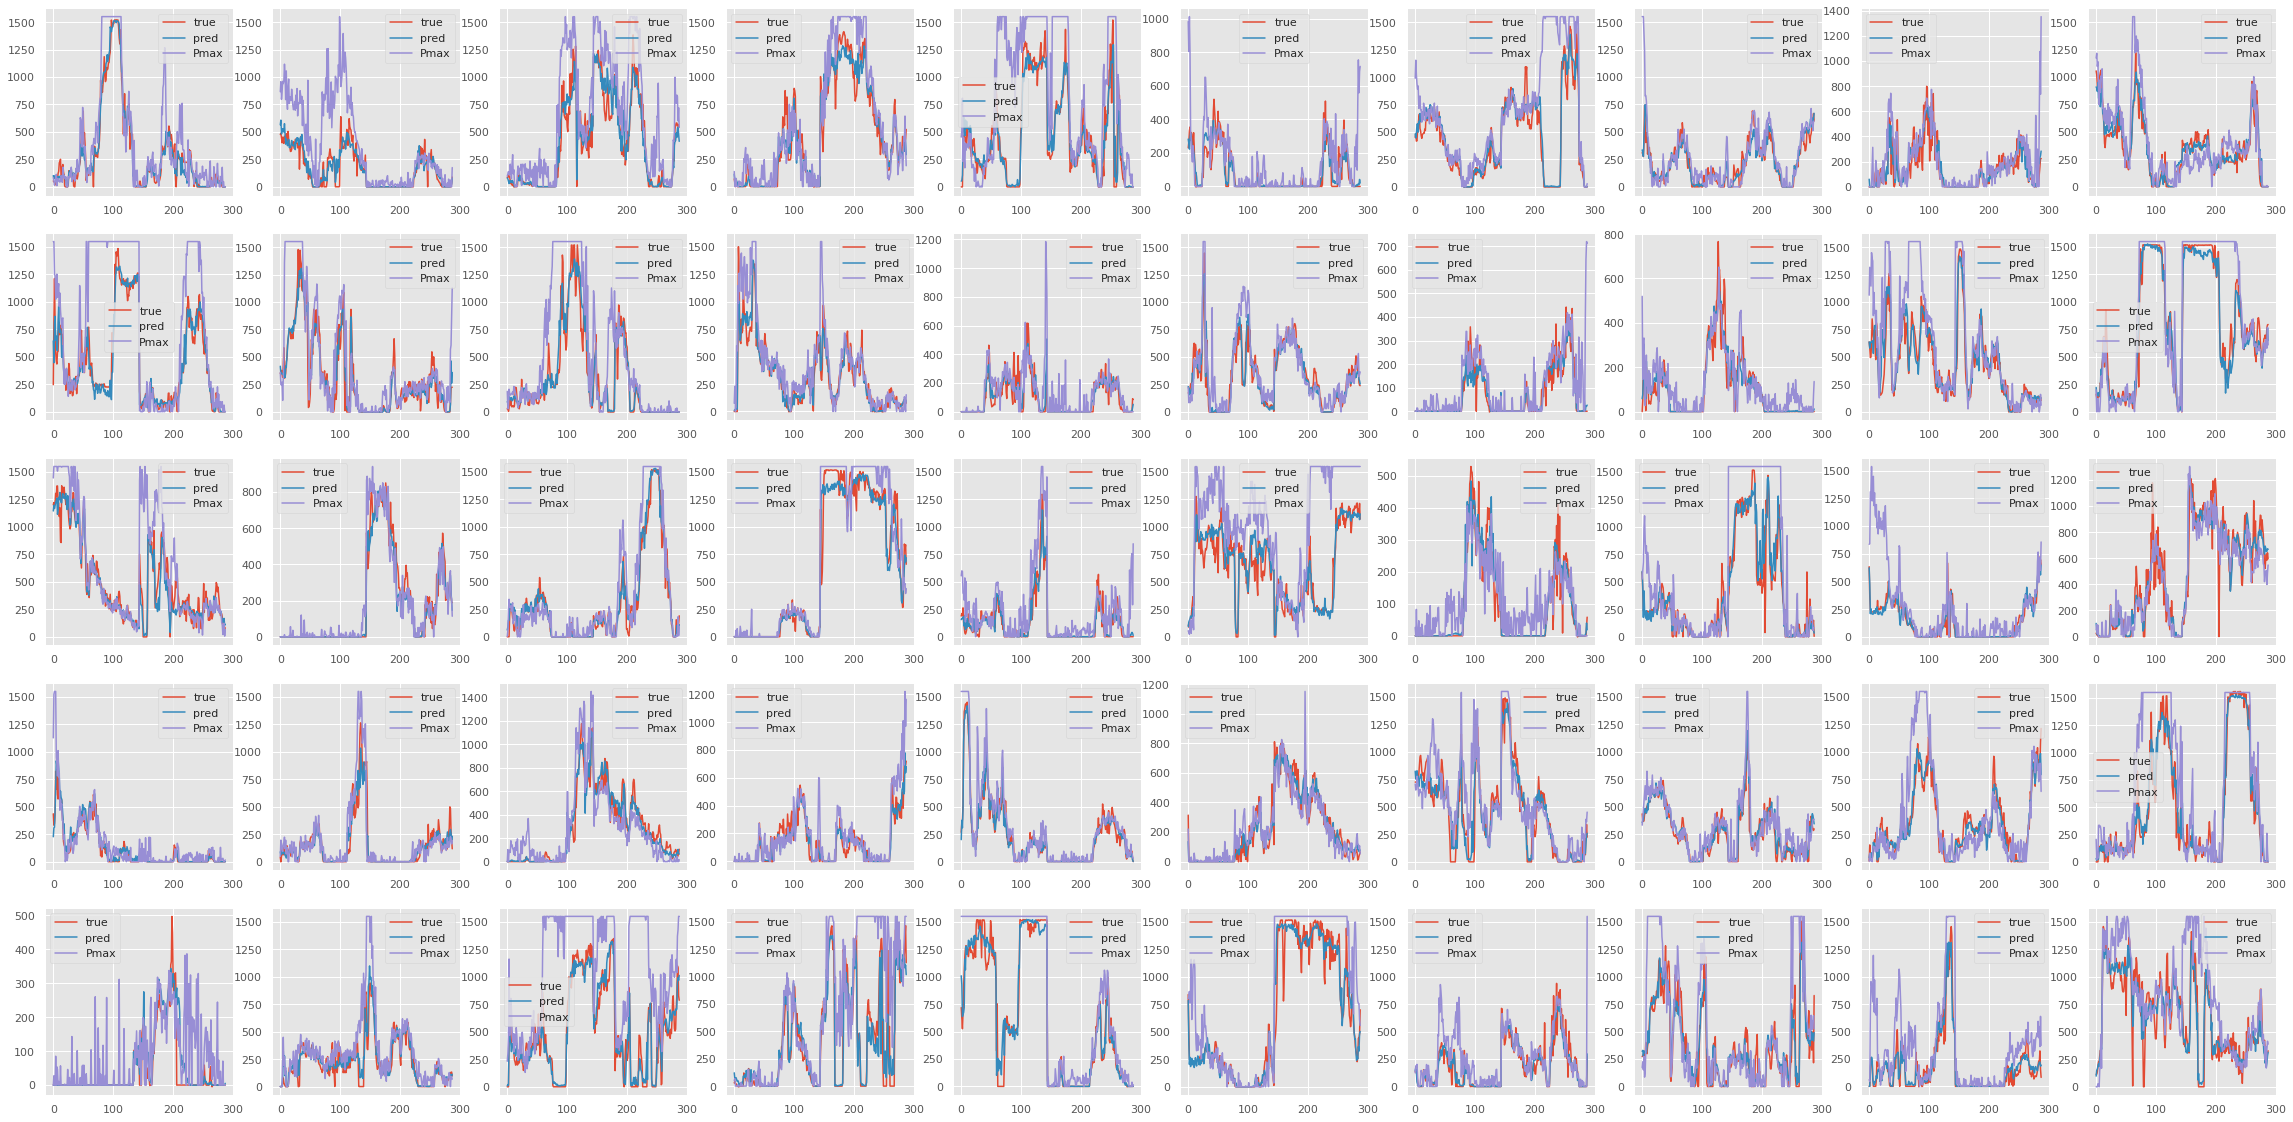

### test
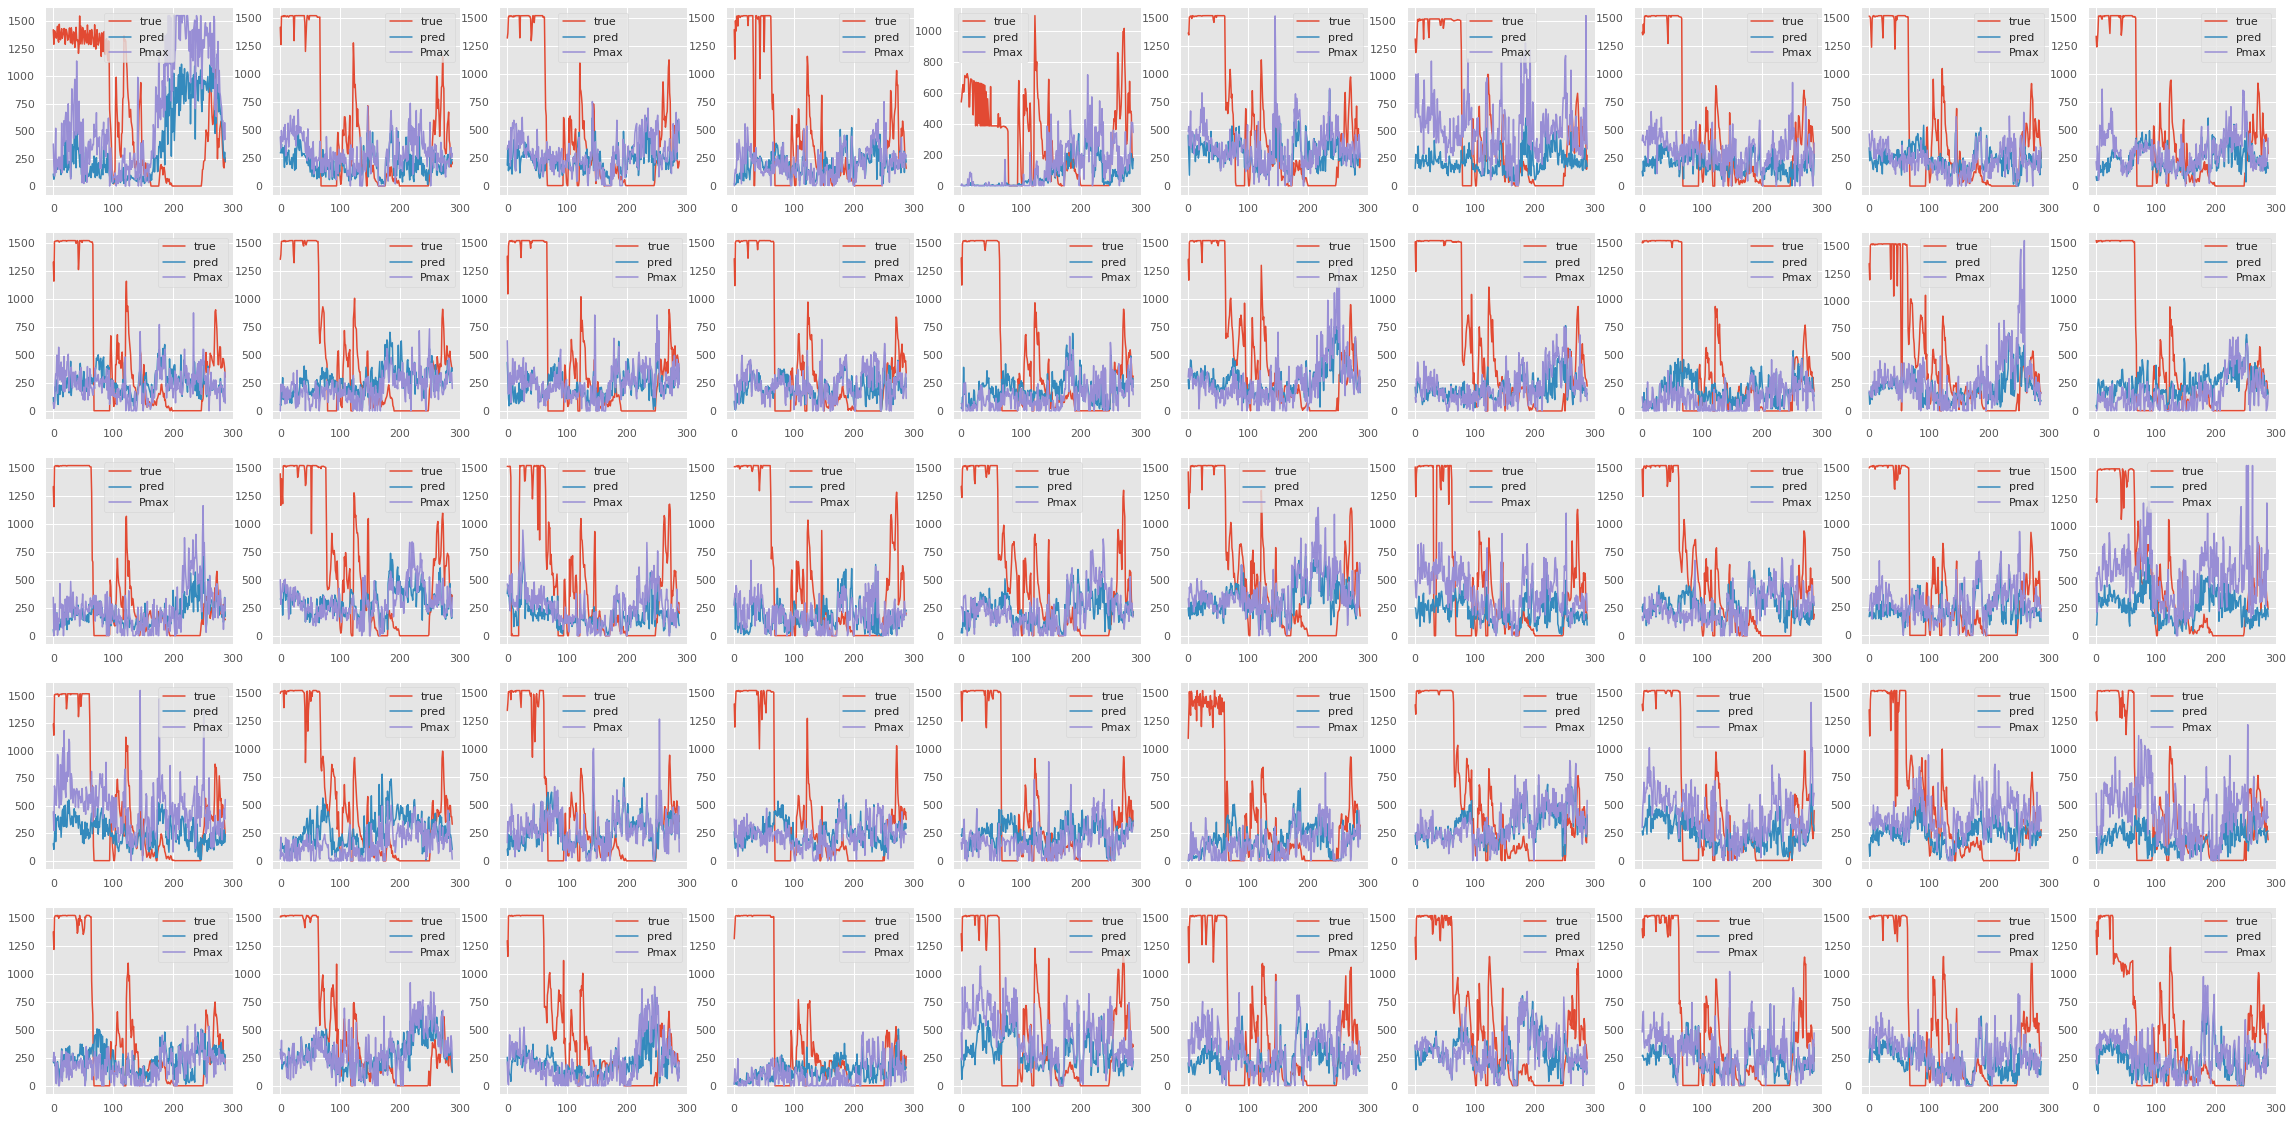


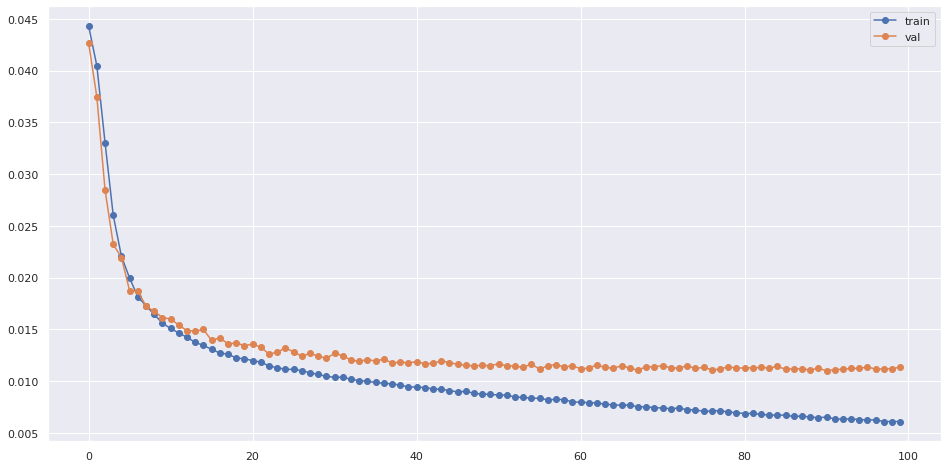

# 3

### Model parameters
d_model = 512 # Lattent dim
q = 32 # Query size
v = 32 # Value size
h = 8 # Number of heads
N = 2 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.1 # Dropout rate
pe = None # Positional encoding
chunk_mode = None


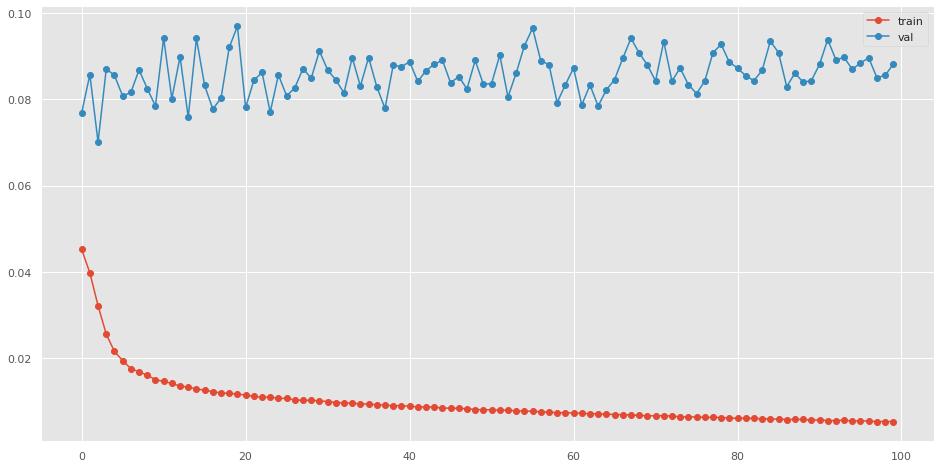

Accuracy:  55.5277%

 	 RMSE: 412.9838139647391, MAE: 309.86258943305285

 --- Overall Score --- 
	361.423201698896

# 4

### hourly stride

### Model parameters
d_model = 1024 # Lattent dim
q = 64 # Query size
v = 64 # Value size
h = 16# Number of heads
N = 6 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.3 # Dropout rate
pe = None # Positional encoding
chunk_mode = None

d_input = train_x.shape[-1] # From dataset
d_output = train_y.shape[-1] # From dataset



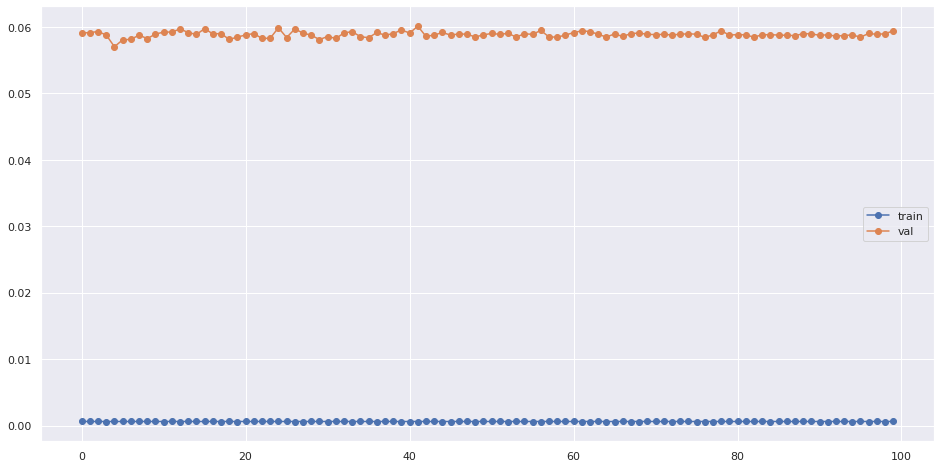

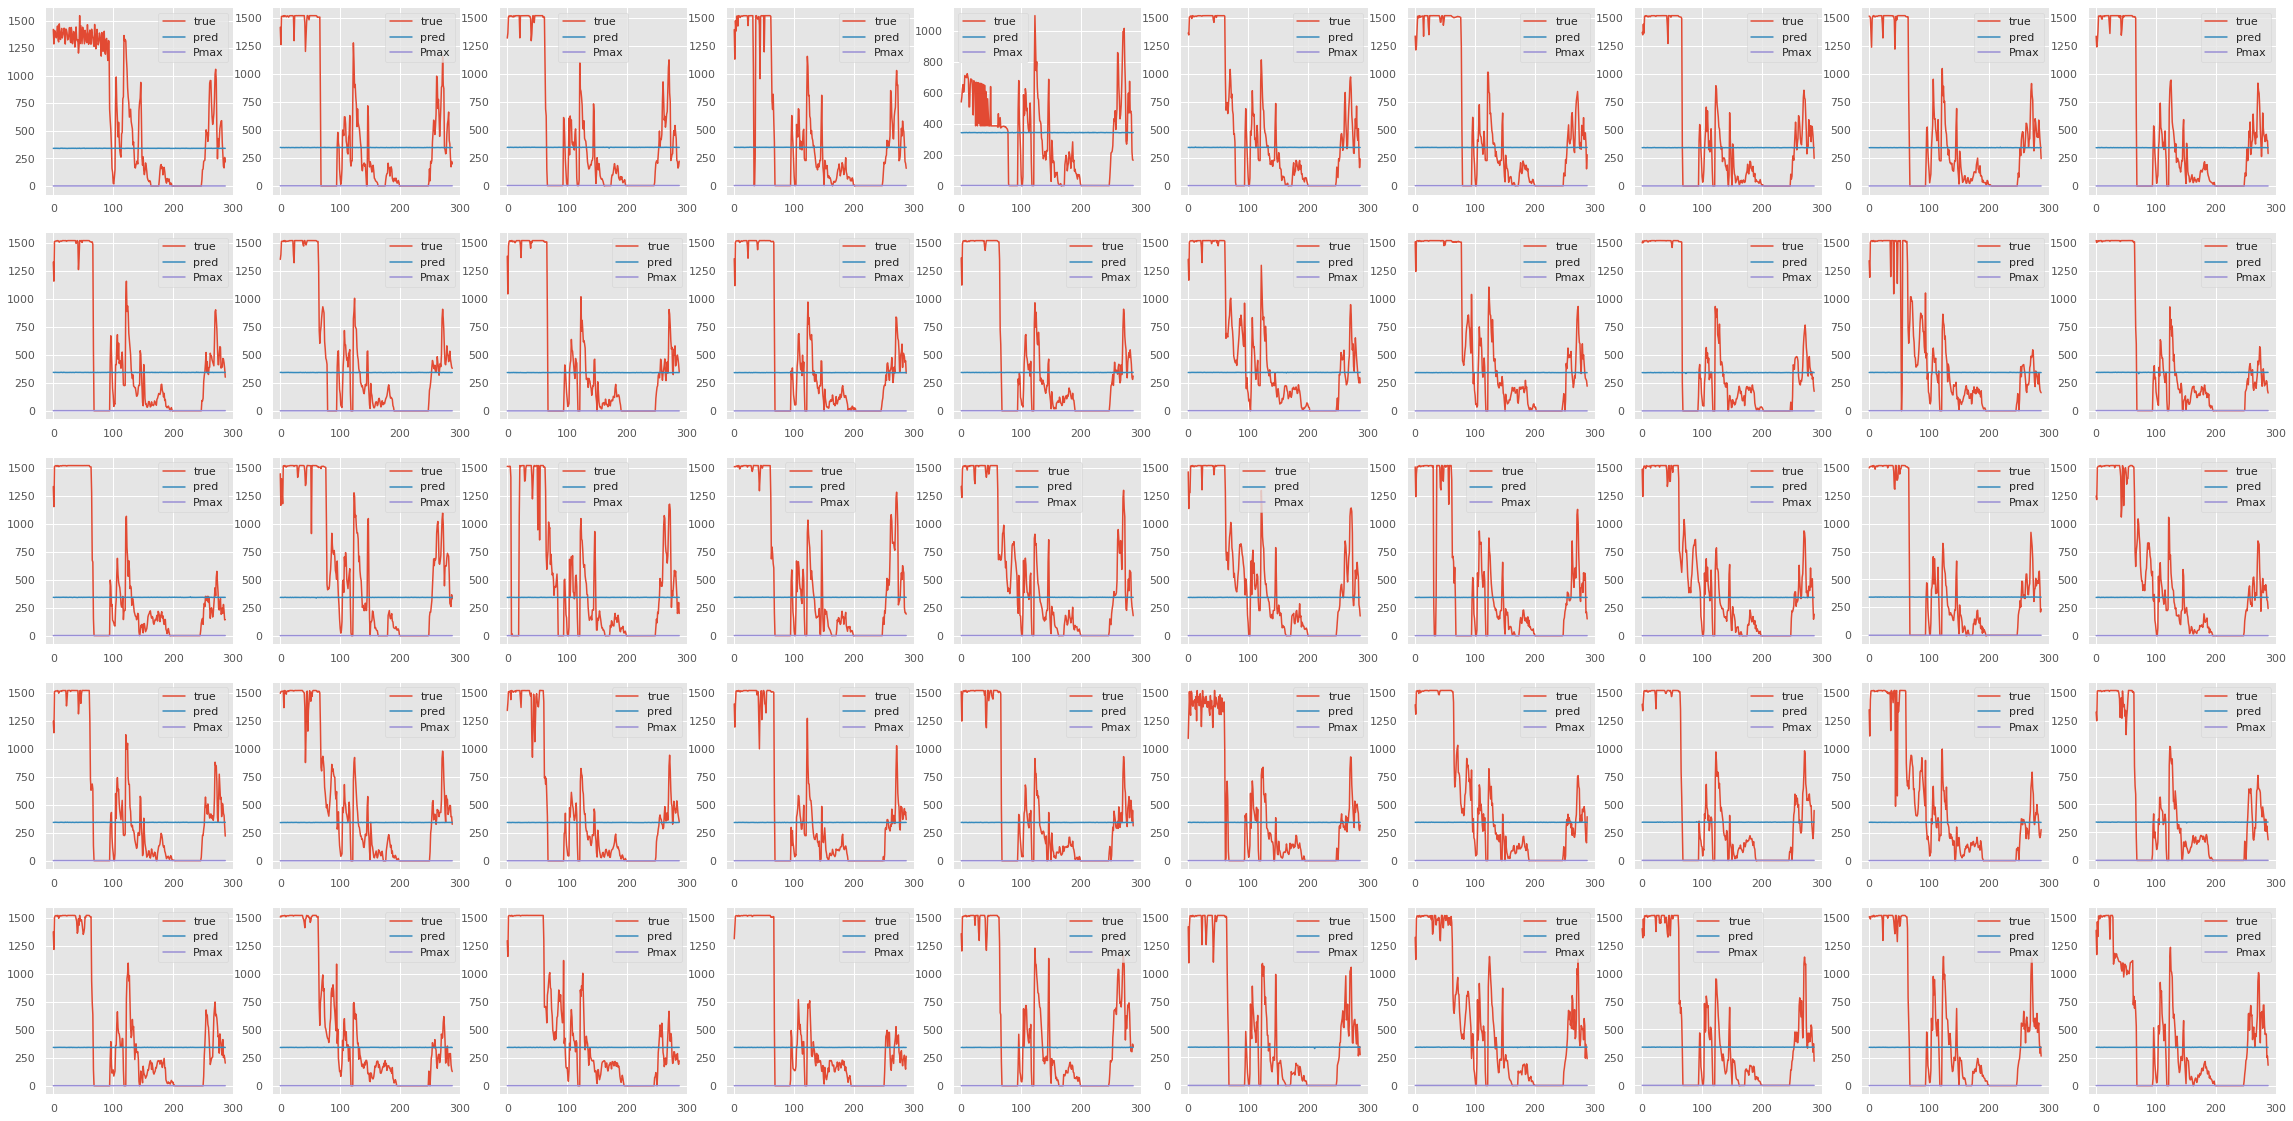

# 5

['TurbID', 'Day','Tmstamp','TSR', 'Pab',  'Patan', 'Wspd_cube', 'Wspd', 'WspdX', 'RPM', 'Papt', 'Pmax','Patv']
### daily stride
### Model parameters
d_model = 128 # Lattent dim
q = 32 # Query size
v = 32 # Value size
h = 4 # Number of heads
N = 1 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.3 # Dropout rate
pe = None # Positional encoding
chunk_mode = None


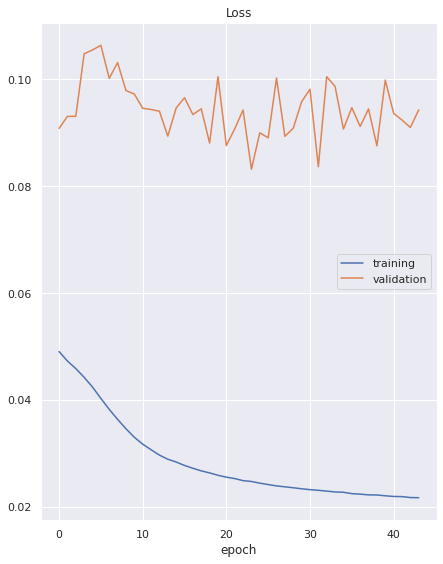
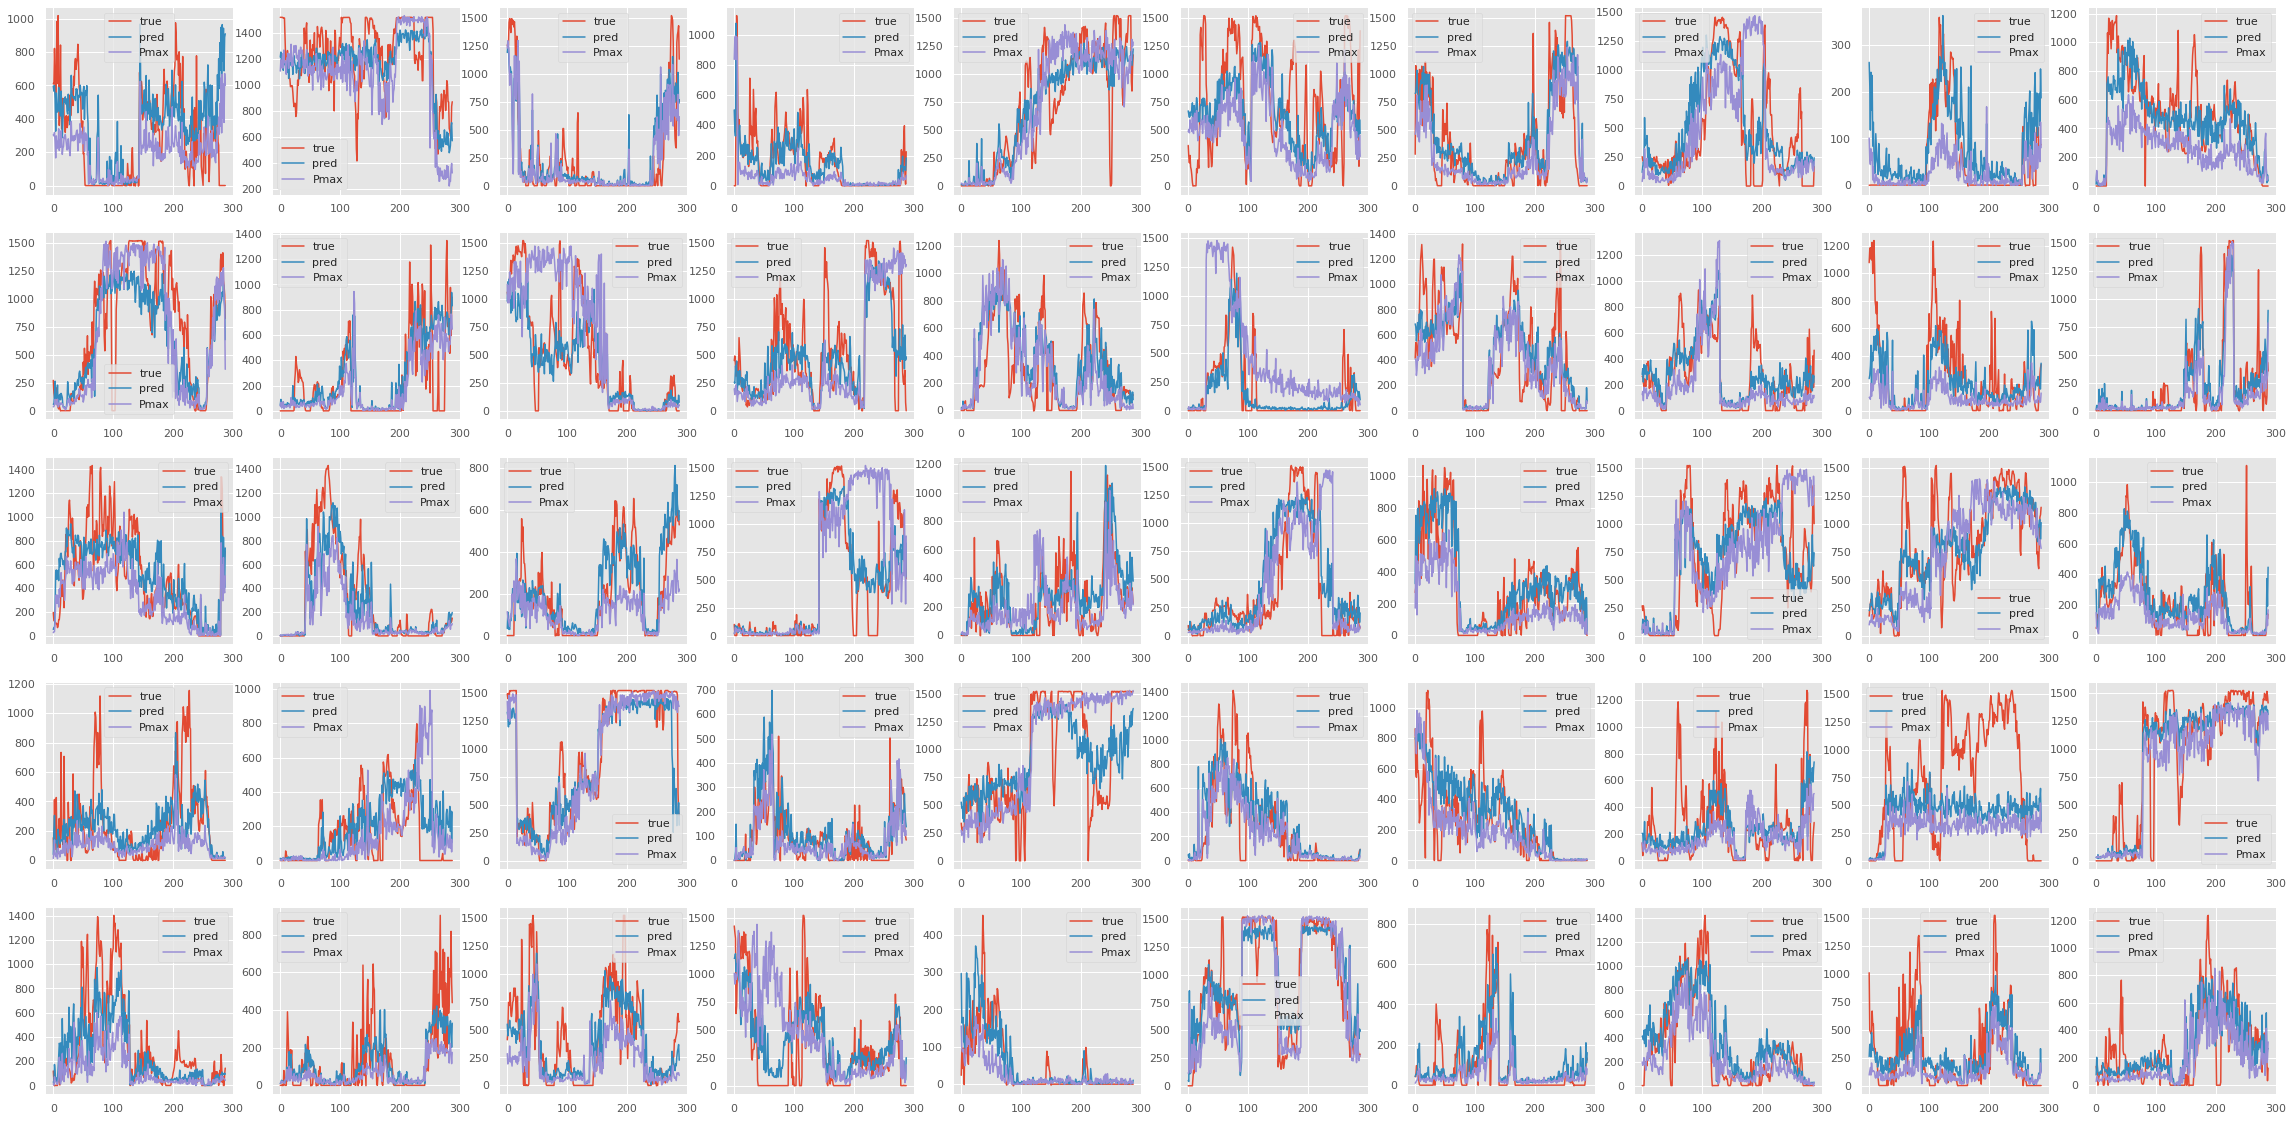

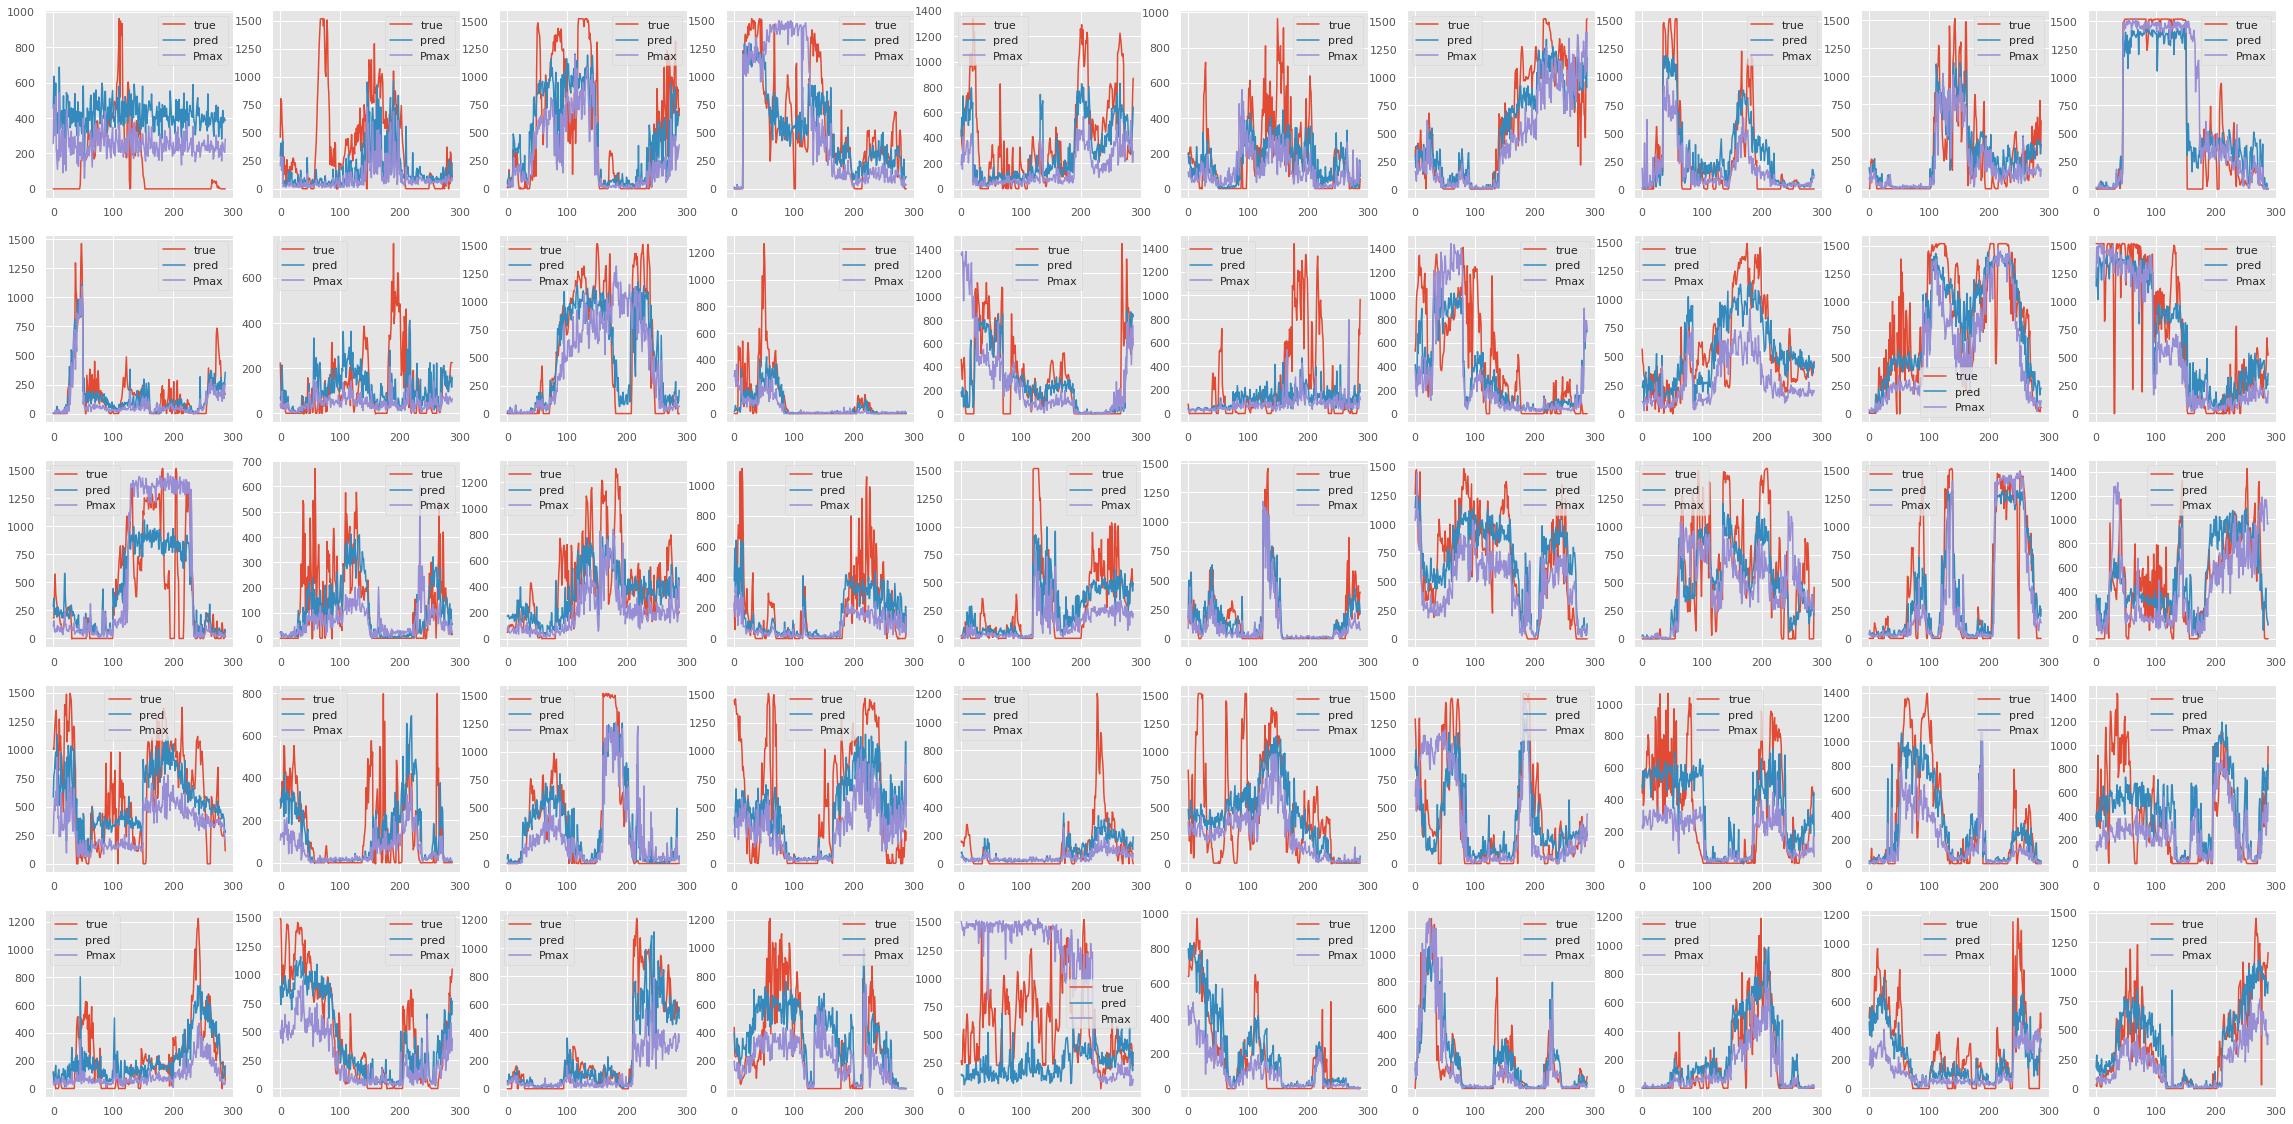

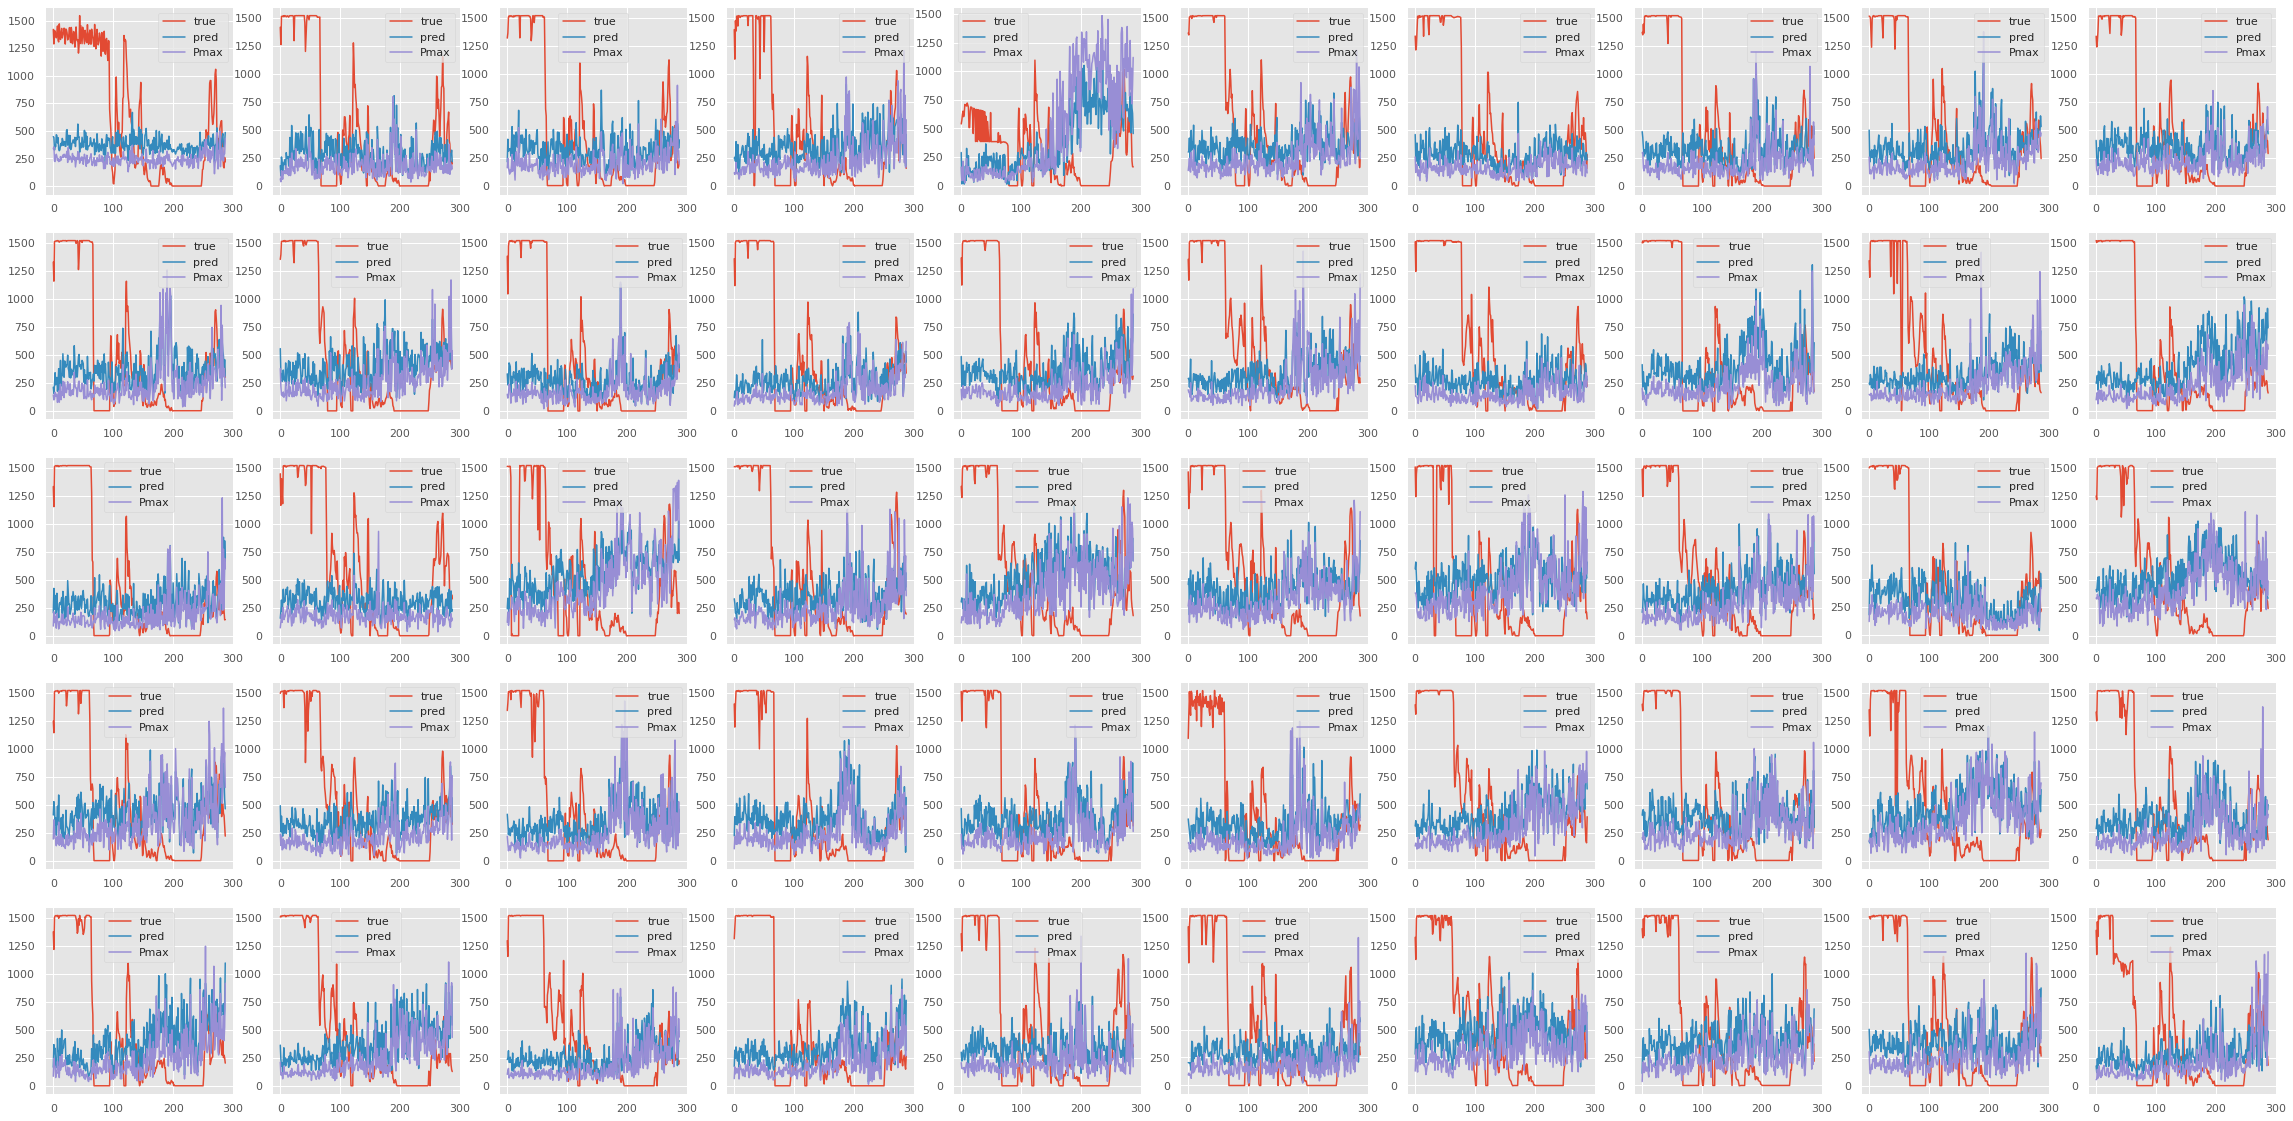

Accuracy:  64.0578%

 	 RMSE: 384.2925456848269, MAE: 312.72209008466524

 --- Overall Score --- 
	348.50731788474604

# 6

 ['TurbID', 'Day','Tmstamp','TSR3', 'TSR2', 'TSR1',  'Pab3', 'Pab2', 'Pab1', 'Bspd2', 'Bspd3', 'Bspd1','Patan', 'Wspd_cube', 'Wspd', 'WspdX', 'Papt','Prtv', 'Pmax', 'Patv']


### every second hourly stride
### Model parameters
d_model = 128 # Lattent dim
q = 32 # Query size
v = 32 # Value size
h = 4 # Number of heads
N = 1 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.3 # Dropout rate
pe = None # Positional encoding
chunk_mode = None


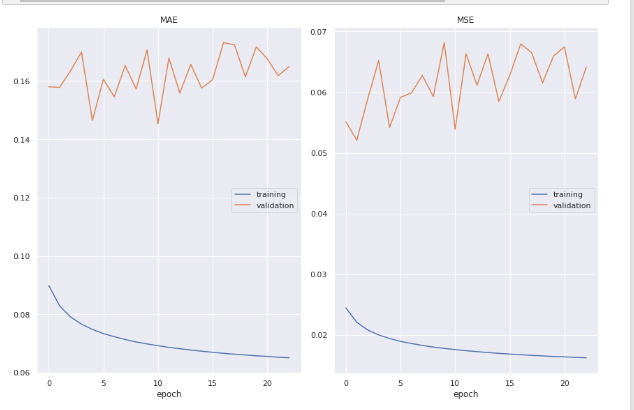

Accuracy:  51.4085%

 	 RMSE: 499.26860006138077, MAE: 412.31744782156613

 --- Overall Score --- 
	455.79302394147345


# 7


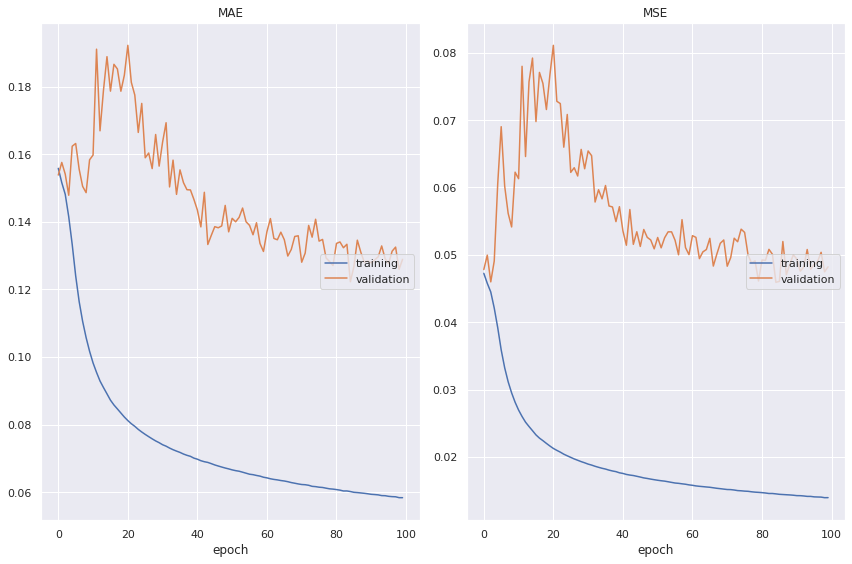

features = ['TurbID','Tmstamp','Day','RPM', 'Bspd1', 'Bspd3', 'Bspd2', 'WspdX', 'Wspd', 'Wspd_cube', 'Pmax', 'Pab1', 'Pab2', 'Pab3', 'TSR1', 'TSR2', 'TSR3', 'Prtv','Patv']


# Model parameters
d_model = 128 # Lattent dim
q = 16 # Query size
v = 16 # Value size
h = 8 # Number of heads
N = 4 # Number of encoder and decoder to stack
attention_size = None # Attention window size
dropout = 0.5 # Dropout rate
pe = None # Positional encoding
chunk_mode = None


features = ['TurbID', 'Day', 'Tmstamp','Etmp4', 'Etmp5', 'Patv5','Wspd5', 'locX', 'locY','TimeX', 'TimeY', 'DayX', 'DayY', 'WdirX', 'WdirY','Wspd',  'Etmp_abs',  'Bspd2', 'Bspd3', 'Bspd1', 'Papt','Patv']

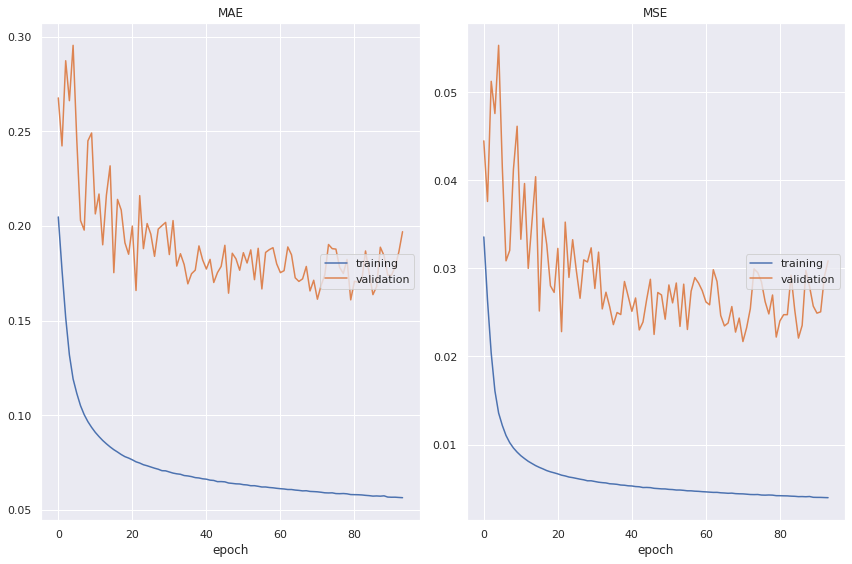
MAE
	training         	 (min:    0.056, max:    0.205, cur:    0.056)
	validation       	 (min:    0.161, max:    0.296, cur:    0.197)
MSE
	training         	 (min:    0.004, max:    0.034, cur:    0.004)
	validation       	 (min:    0.022, max:    0.055, cur:    0.031)

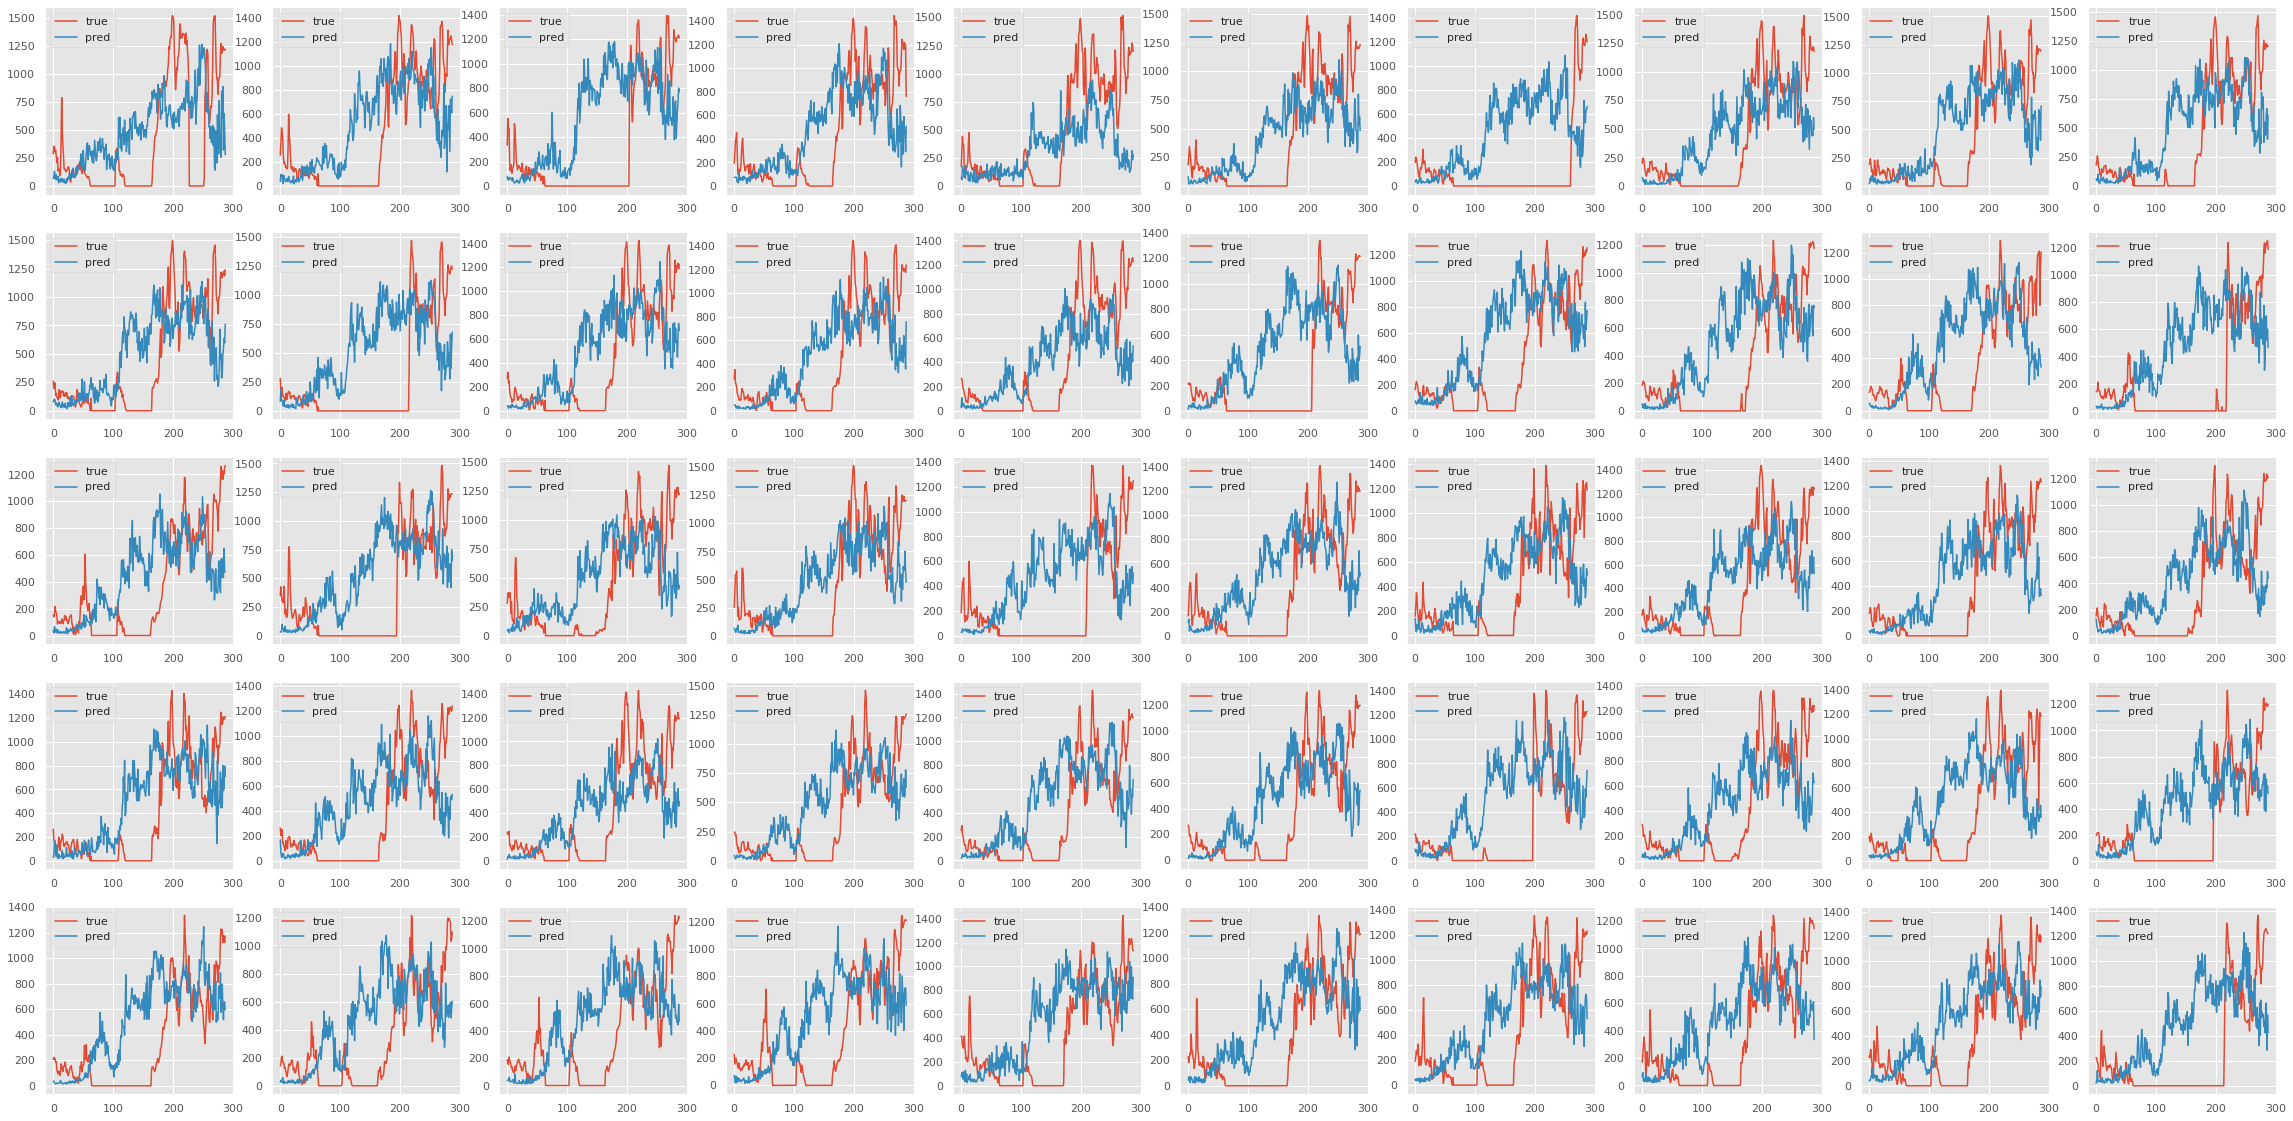



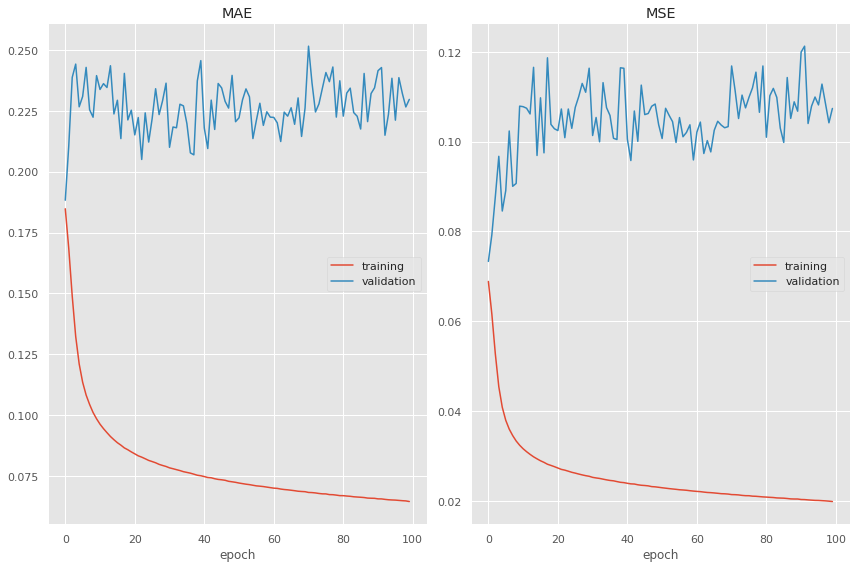

In [ ]:
features = ['TurbID', 'Day', 'Tmstamp','Etmp4', 'Etmp5', 'Patv5','Wspd5', 'locX', 'locY','TimeX', 'TimeY', 'DayX', 'DayY', 'WdirX', 'WdirY',  'Bspd2', 'Bspd3', 'Bspd1', 'Etmp_abs','Wspd', 'C']